In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_path = '../data/'

In [3]:
big_six = ['Man United', 'Man City', 'Liverpool', 'Arsenal', 'Tottenham', 'Chelsea']

## Goal difference

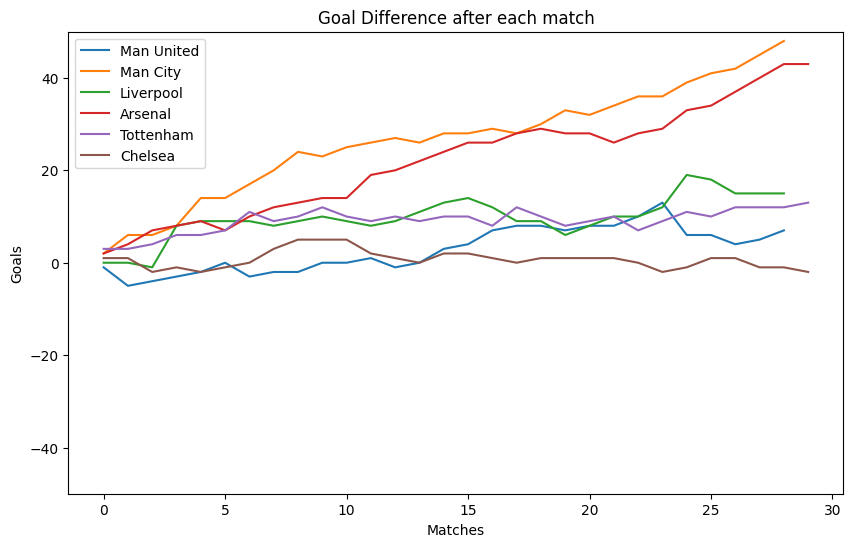

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.set_ylim(-50, 50)

for team in big_six:
    # import goal differnce data
    gd = pd.read_csv(data_path + team + '_goal_diff.csv')
    ax.plot(gd['MatchDay'], gd['GD'], label=team)

ax.set_title('Goal Difference after each match')
ax.set_xlabel('Matches')
ax.set_ylabel('Goals')
ax.legend()

## Yellow and Red Cards

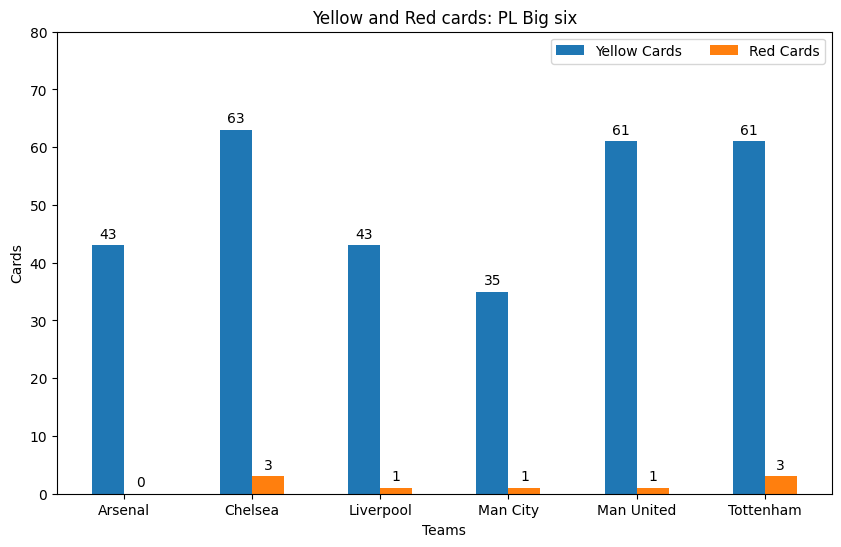

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.set_ylim(0, 80)

# import cards data
cards = pd.read_csv(data_path + 'yellow_red.csv')
big_six_cards = cards.loc[cards['team'].isin(big_six)]

# set position of bars on x-axis
x = np.arange(big_six_cards.shape[0])
x*=2

width = 0.5
multiplier = 0

bars = ['yellow_cards', 'red_cards']

for bar in bars:

    offset = width*multiplier
    label = ' '.join(bar.split('_')).title() # make label from bar name
    rects = ax.bar(x + offset, big_six_cards[bar], width, label=label)
    ax.bar_label(rects, padding=3) # add label to each bars
    multiplier += 1

ax.set_xlabel('Teams')
ax.set_ylabel('Cards')
ax.set_title('Yellow and Red cards: PL Big six')
ax.set_xticks(x + width/2, big_six_cards['team']) # add team name to x axis
ax.legend(loc='upper right', ncols=2)

## Away and Home Goals 

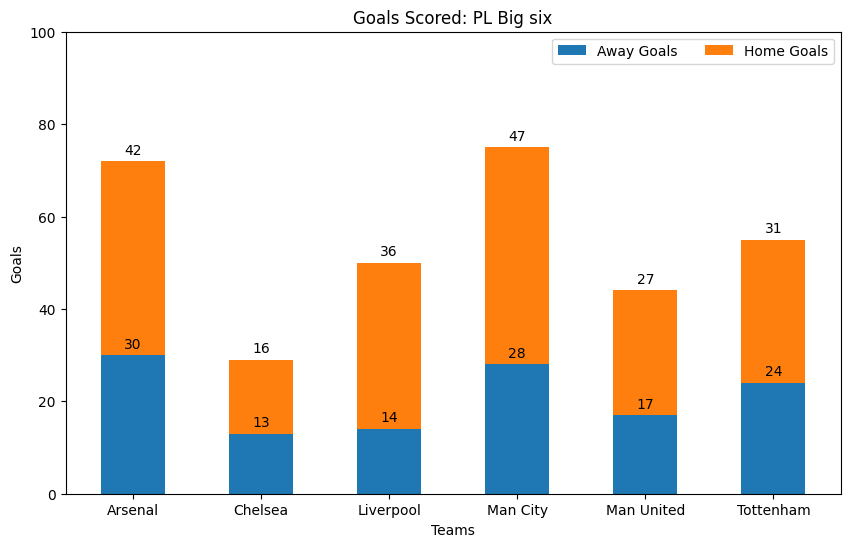

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)
ax.set_ylim(0, 100)

# import goals data
goals = pd.read_csv(data_path + 'goals.csv')
big_six_goals = goals.loc[cards['team'].isin(big_six)]

x = np.arange(big_six_cards.shape[0]) # set postion of bars on x-axis
bottom = np.zeros(big_six_cards.shape[0]) # create bottom of stacked bars

bars = ['away_goals', 'home_goals']

for bar in bars:

    label = ' '.join(bar.split('_')).title() # make label from bar name
    rects = ax.bar(x, big_six_goals[bar], width=0.5, bottom=bottom, label=label)
    ax.bar_label(rects, padding=3, labels=big_six_goals[bar]) # add label to each bars
    bottom += big_six_goals[bar]

plt.xlabel('Teams')
plt.ylabel('Goals')
plt.title('Goals Scored: PL Big six')
ax.set_xticks(x, big_six_cards['team'])
ax.legend(loc='upper right', ncols=2)